In [1]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Generate a non-linear dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

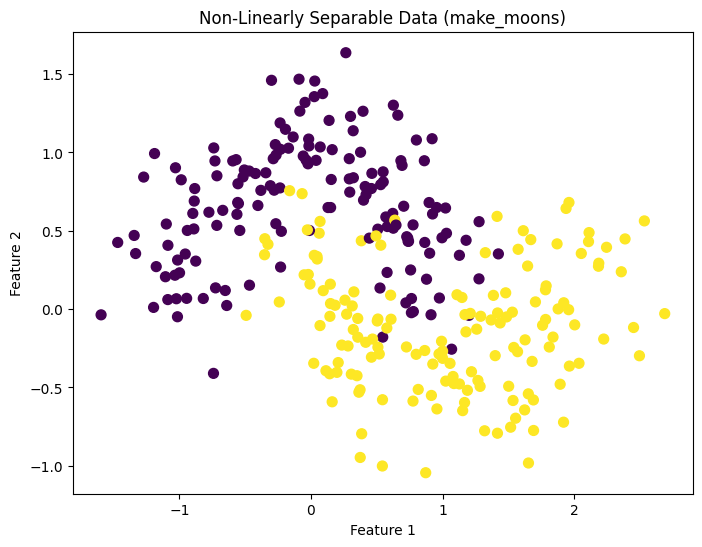

In [2]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title("Non-Linearly Separable Data (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

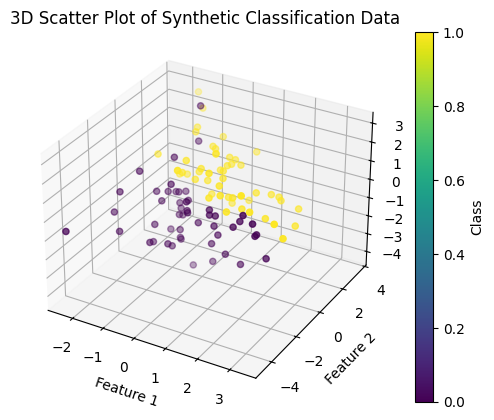

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset with 3 features
X, y = make_classification(
    n_samples=100,
    n_features=3,       # Total number of features
    n_informative=3,    # Number of informative features
    n_redundant=0,      # Number of redundant features
    n_repeated=0,       # Number of repeated features
    n_classes=2,        # Number of classes
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', marker='o')

# Add labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Synthetic Classification Data')

# Show color bar
plt.colorbar(scatter, ax=ax, label='Class')

# Show the plot
plt.show()

In [4]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Train an SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5, random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(gamma=0.5, random_state=42)

In [6]:
# Predict on the test set
y_pred = svm_rbf.predict(X_test)

In [7]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.82      0.78      0.80        18

    accuracy                           0.77        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30

Accuracy: 76.67%


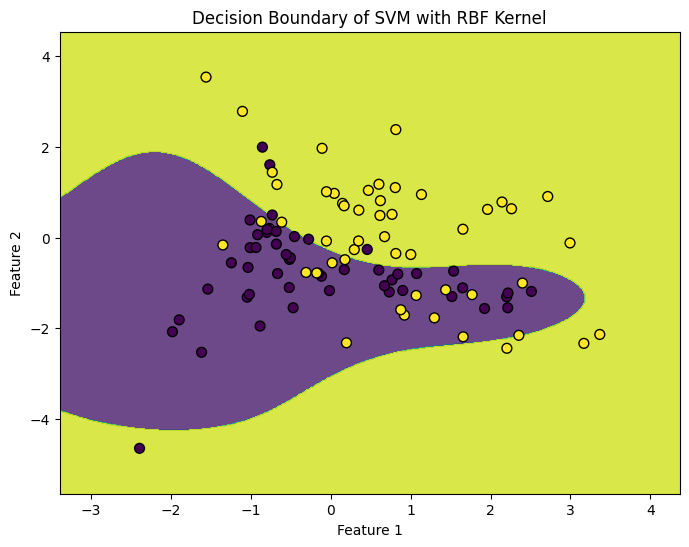

In [9]:
import numpy as np

# Create a grid of points
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

# Predict classes for each grid point
Z = svm_rbf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape)]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Decision Boundary of SVM with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import rbf_kernel

# Compute the RBF kernel matrix (similarity values) for the dataset
gamma = 0.5  # Same gamma used in the SVM model
rbf_features = rbf_kernel(X, X, gamma=gamma)

# Take the first three principal components of the RBF-transformed data for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_rbf_3d = pca.fit_transform(rbf_features)

# Plot the 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color by class
ax.scatter(X_rbf_3d[:, 0], X_rbf_3d[:, 1], X_rbf_3d[:, 2], c=y, cmap='viridis', s=50, edgecolor='k')

ax.set_title("3D Visualization of Data Transformed by RBF Kernel")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

plt.show()